# 模拟队列  
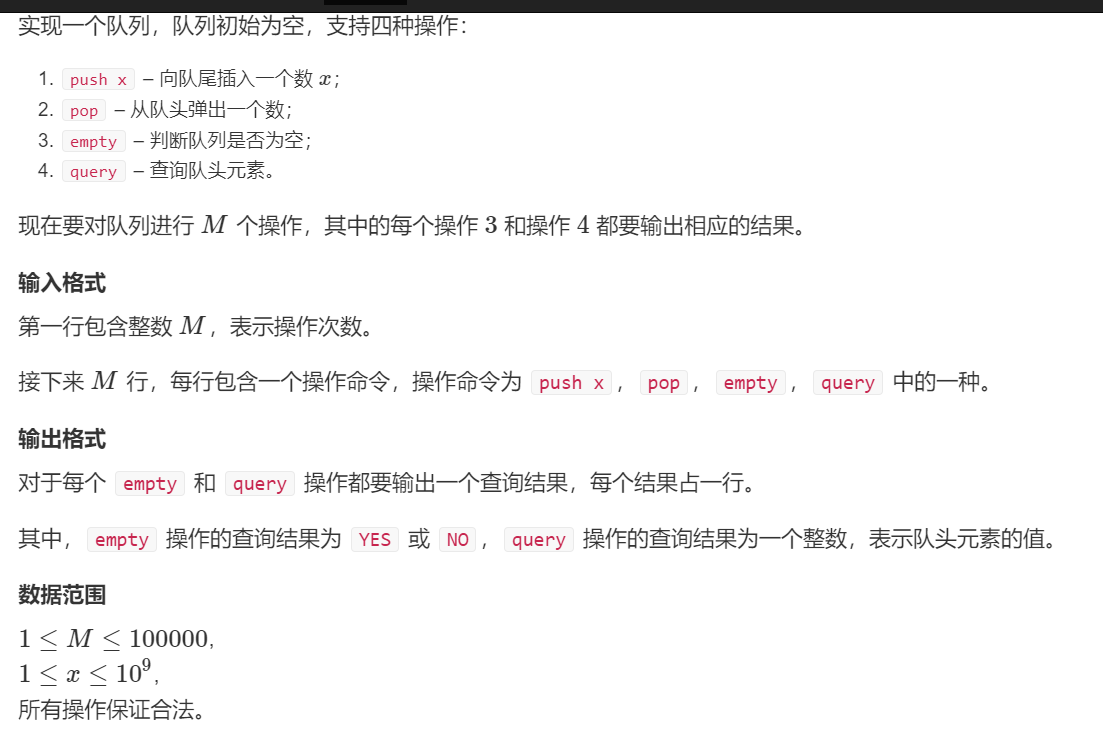

```c
#include <iostream>

using namespace std;
const int N = 100010;
int a[N], front, rear;

void init()
{
    front = 0;
    rear = -1;
}

void que_push(int x)
{
    a[++rear] = x;
}

void que_pop()
{
    front++;
}

void que_empty()
{
    if(rear >= front)
    cout << "NO" << endl;
    else
    cout << "YES" << endl;
}

void que_query()
{
    cout << a[front] << endl;
}

int main()
{
    int m;
    cin >> m;
    init();
    while(m--)
    {
        string s;
        cin >> s;
        int x;
        if(s == "push")
        {
            cin >> x;
            que_push(x);
        }else if(s == "pop")
        {
            que_pop();
        }else if(s == "empty")
        {
            que_empty();
        }else if(s == "query")
        {
            que_query();
        }
    }
    return 0;
}
```

# 单调栈  
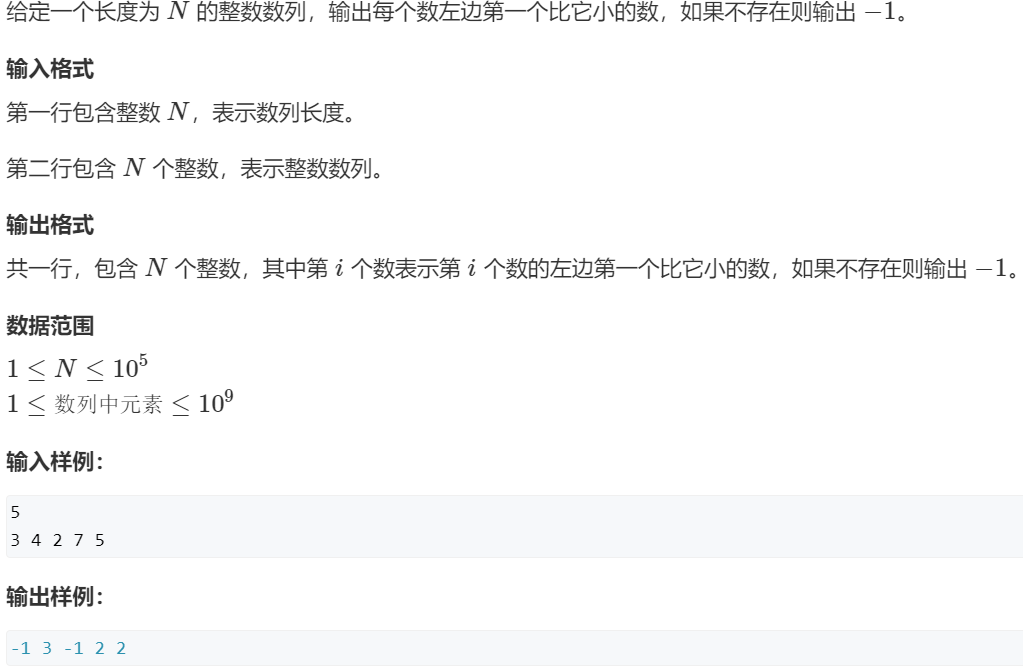

```c
#include <iostream>

using namespace std;
const int N = 100010;

//stk存储栈中元素，tt指向栈顶元素的下一个位置
int stk[N], tt = 0;

int main()
{
    int n;
    cin >> n;
    for(int i = 0;i < n;i++)
    {
        int x;
        cin >> x;
        //根本性质：如果栈中有i < j，且a[i] >= a[j]的元素，则i永远不肯作为结果输出，因此a[i]可以出栈
        //栈不为空时，比较当前输入元素和栈顶元素，如果栈顶元素大于当前元素则出栈，否则输出栈顶元素然后入栈
        while(tt && stk[tt - 1] >= x) tt--;
        if(tt)
        cout << stk[tt - 1] << " ";
        else
        cout << "-1 ";
        stk[tt++] = x;
    }
    return 0;
}
```

# 单调队列  
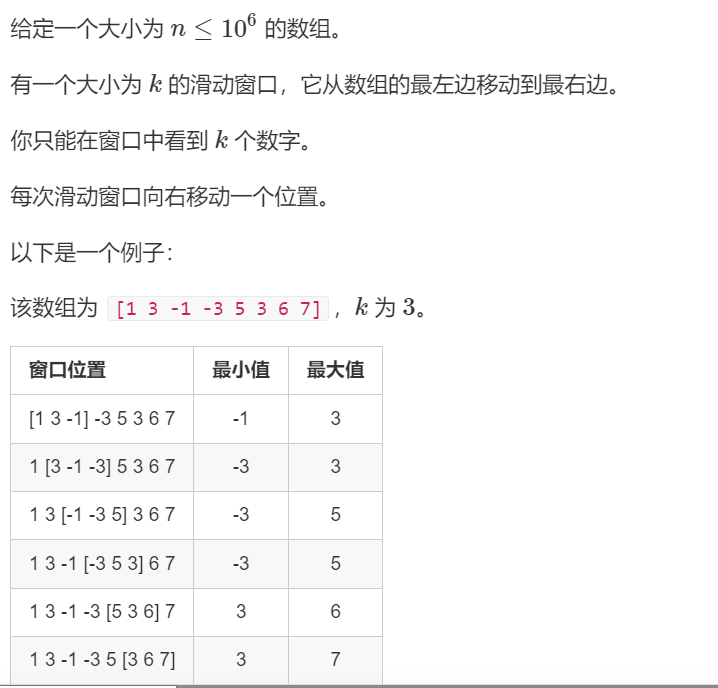  
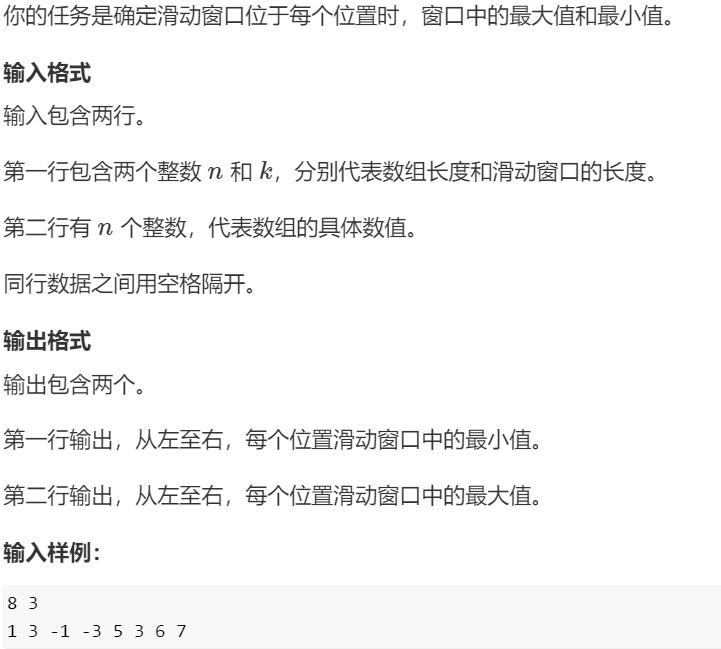  

```c
#include <iostream>

using namespace std;
const int N = 1000010;
//队列中存储下标，队列里存数组元素是不行的！！！
int que[N], front = 0, rear = -1, a[N];

int main()
{
    int n, k;
    cin >> n >> k;
    for(int i = 0;i < n;i++) cin >> a[i];

    //找到滑动串口的最小值，根本性质：如果队列中有i < j且a[i] >= a[j]的元素，那么a[i]元素得出队，因为a[j]位置更靠后
    for(int i = 0;i < n;i++)
    {
        //判断队头元素是否超过了滑动窗口的边界
        if(i - k + 1 > que[front])  front++;
        //当前元素和队头元素进行比较，执行出队操作
        while(front <= rear && a[que[rear]] >= a[i]) rear--; 
        //当前元素入队
        que[++rear] = i;
        //只有i大于等于前k个数时才进行输出
        if(i >= k - 1) cout << a[que[front]] << " ";
    }

    puts("");
    //队列初始化
    front = 0, rear = -1;
    //找滑动窗口的最大值
    for(int i = 0;i < n;i++)
    {
        if(i - k + 1 > que[front]) front++;
        while(front <= rear && a[que[rear]] <= a[i]) rear--;
        que[++rear] = i;
        if(i >= k - 1) cout << a[que[front]] << " ";
    }
    return 0;
}
```